# Projet

## Mise en place de l'environnement

In [ ]:
!pip install numpy pandas matplotlib tensorflow scikit-learn mlflow

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import pickle



## Exploration des donn√©es - CIFAR-100

### Chargement des donn√©es

Le jeu de donn√©es CIFAR-100 est charg√© √† l'aide de la biblioth√®que `tensorflow.keras`.
Il contient :
- **Nombre total d'images** : 60 000.
  - **Entra√Ænement** : 50 000 images.
  - **Test** : 10 000 images.
- **Caract√©ristiques des donn√©es** :
  - Chaque image a une taille de **32x32 pixels** avec **3 canaux de couleur** (RVB).
  - Les images appartiennent √† **100 classes fines** (cat√©gories d√©taill√©es) r√©parties de mani√®re √©quilibr√©e.
- **Repr√©sentation des caract√©ristiques** :
  - Les images peuvent √™tre utilis√©es sous forme de matrices 3D (32x32x3) ou transform√©es en vecteurs plats (3072 valeurs).



In [ ]:
# Chargement des donn√©es
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

# Aper√ßu des dimensions des donn√©es
print(f"Dimensions des images d'entra√Ænement : {x_train.shape}")
print(f"Dimensions des labels d'entra√Ænement : {y_train.shape}")
print(f"Dimensions des images de test : {x_test.shape}")
print(f"Dimensions des labels de test : {y_test.shape}")

169001437/169001437 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 0us/step
Dimensions des images d'entra√Ænement : (50000, 32, 32, 3)
Dimensions des labels d'entra√Ænement : (50000, 1)
Dimensions des images de test : (10000, 32, 32, 3)
Dimensions des labels de test : (10000, 1)


### Visualisation des donn√©es

Affichons quelques exemples d'images avec leurs labels pour comprendre leur structure visuelle et v√©rifier leur qualit√©.

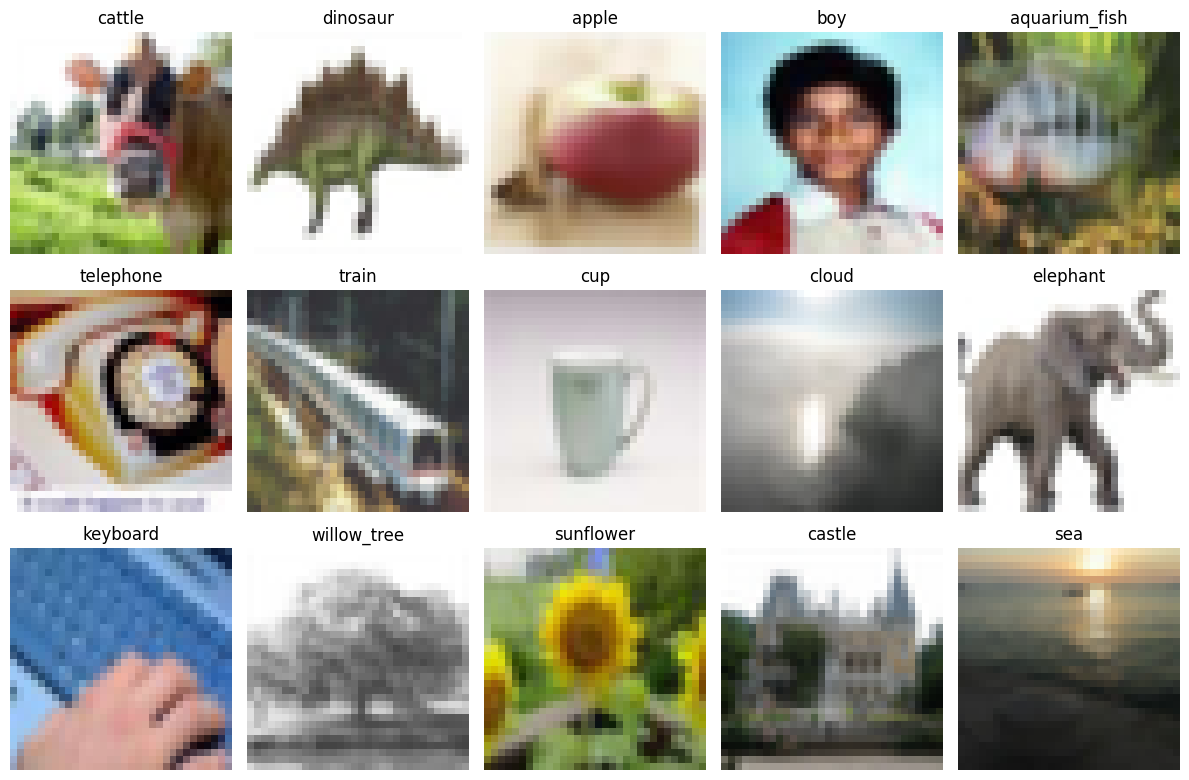

In [ ]:
# Liste des classes dans CIFAR-100 (labels "fine")
class_names = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle',
    'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle',
    'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard',
    'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain',
    'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree',
    'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket',
    'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider',
    'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor',
    'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm'
]

# Visualisation d'√©chantillons
fig, axes = plt.subplots(3, 5, figsize=(12, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[i])
    ax.set_title(f"{class_names[y_train[i][0]]}")
    ax.axis("off")
plt.tight_layout()
plt.show()

## Pr√©traitement des donn√©es - CIFAR-100


### V√©rification des d√©s√©quilibres
Bien que CIFAR-100 soit √©quilibr√© par d√©faut, on peut visualiser la r√©partition des classes pour confirmation :

In [ ]:
# V√©rification de l'√©quilibre des classes
train_counts = pd.Series(np.squeeze(y_train)).value_counts()
test_counts = pd.Series(np.squeeze(y_test)).value_counts()

# Chaque classe devrait avoir un nombre similaire d'instances
assert (train_counts.min() == train_counts.max()), "Les classes d'entra√Ænement ne sont pas √©quilibr√©es."
assert (test_counts.min() == test_counts.max()), "Les classes de test ne sont pas √©quilibr√©es."

print("Les classes sont √©quilibr√©es dans les donn√©es d'entra√Ænement et de test.")


Les classes sont √©quilibr√©es dans les donn√©es d'entra√Ænement et de test.


### Normalisation des pixels

Les pixels des images sont initialement compris dans la plage **[0, 255]**. Nous les normalisons dans une plage **[0, 1]** pour faciliter la convergence des mod√®les et uniformiser les donn√©es.

In [ ]:
# Normalisation des pixels
x_train = x_train / 255.0
x_test = x_test / 255.0

print(f"Valeurs apr√®s normalisation : Min = {x_train.min()}, Max = {x_train.max()}")


Valeurs apr√®s normalisation : Min = 0.0, Max = 1.0


### Nouvelle section

In [ ]:
# Aplatir les images
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

## RandomForestClassifier

## MLP

## CNN

### Recherche d'hyperparam√®tres et validation crois√©e pour le CNN


1. **Augmentation des donn√©es :**
   - Les images du dataset sont augment√©es √† l'aide de transformations comme la rotation, le d√©calage, le cisaillement et la sym√©trie horizontale pour augmenter la diversit√© des donn√©es d'entra√Ænement.

2. **Construction d'un mod√®le CNN param√©trable :**
   - Une fonction g√©n√©rique (`create_cnn_model`) permet de construire dynamiquement un CNN avec diff√©rents hyperparam√®tres, tels que le nombre de filtres dans les couches convolutionnelles, les taux de dropout, et le nombre de neurones dans les couches enti√®rement connect√©es.
     

3. **Recherche d'hyperparam√®tres :**
   - Utilisation de **Keras Tuner** pour effectuer une recherche en grille **(*grid search*)** des meilleurs hyperparam√®tres.

4. **Validation crois√©e K-Fold :**
   - Le dataset est divis√© en 3 sous-ensembles (folds), et la validation crois√©e est utilis√©e pour √©valuer la robustesse du mod√®le.

5. **Suivi et journalisation des exp√©rimentations avec MLflow :**
   - Les hyperparam√®tres, les m√©triques (pr√©cision et perte), ainsi que les mod√®les entra√Æn√©s sont enregistr√©s dans un serveur **MLflow**, permettant de suivre et comparer les r√©sultats des diff√©rents folds.

6. **Analyse des r√©sultats :**
   - Les pr√©cisions des 3 folds sont agr√©g√©es pour calculer une pr√©cision moyenne et son √©cart-type, fournissant une √©valuation globale de la performance du mod√®le.

In [ ]:
import mlflow
import mlflow.keras
from sklearn.model_selection import KFold
import keras_tuner as kt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Initialisation de MLflow
mlflow.set_tracking_uri("http://34.201.243.188:5000")
mlflow.set_experiment("CIFAR100_CNN_GridSearch")

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.05,
    height_shift_range=0.05,
    horizontal_flip=True,
    shear_range=0.05
)

datagen.fit(x_train)

def create_cnn_model(hp):
    model = Sequential()

    # Premi√®re couche de convolution
    model.add(Conv2D(
        hp.Choice('filters_1', values=[32, 128]),
        (3, 3), activation='relu', padding='same', input_shape=x_train.shape[1:]
    ))
    # Normalisation des lots
    model.add(BatchNormalization())

    # Deuxi√®me couche de convolution
    model.add(Conv2D(
        hp.Choice('filters_2', values=[32, 128]),
        (3, 3), activation='relu', padding='same'
    ))
    # Normalisation des lots
    model.add(BatchNormalization())
    # Premi√®re couche de pooling
    model.add(MaxPooling2D((2, 2)))
    # Premi√®re couche de dropout
    model.add(Dropout(hp.Choice('dropout_1', values=[0.2, 0.3])))

    # Troisi√®me couche de convolution
    model.add(Conv2D(
        hp.Choice('filters_3', values=[64, 192]),
        (3, 3), activation='relu', padding='same'
    ))
    # Normalisation des lots
    model.add(BatchNormalization())

    # Quatri√®me couche de convolution
    model.add(Conv2D(
        hp.Choice('filters_4', values=[64, 192]),
        (3, 3), activation='relu', padding='same'
    ))
    # Normalisation des lots
    model.add(BatchNormalization())
    # Deuxi√®me couche de pooling
    model.add(MaxPooling2D((2, 2)))
    # Deuxi√®me couche de dropout
    model.add(Dropout(hp.Choice('dropout_2', values=[0.2, 0.3])))

    # Cinqui√®me couche de convolution
    model.add(Conv2D(
        hp.Choice('filters_5', values=[128, 256]),
        (3, 3), activation='relu', padding='same'
    ))

    # Normalisation des lots
    model.add(BatchNormalization())

    # Sixi√®me couche de convolution
    model.add(Conv2D(
        hp.Choice('filters_6', values=[256, 384]),
        (3, 3), activation='relu', padding='same'
    ))
    # Normalisation des lots
    model.add(BatchNormalization())

    # Troisi√®me couche de pooling
    model.add(MaxPooling2D((2, 2)))
    # Troisi√®me couche de dropout
    model.add(Dropout(hp.Choice('dropout_3', values=[0.2, 0.3])))

    # Applatissement des caract√©ristiques pour les couches enti√®rement connect√©es
    model.add(Flatten())

    # Couche enti√®rement connect√©e
    model.add(Dense(
        hp.Choice('dense_units', values=[512, 1024]), activation='relu'
    ))
    # Normalisation des lots
    model.add(BatchNormalization())
    # Quatri√®me couche de dropout
    model.add(Dropout(hp.Choice('dropout_4', values=[0.3, 0.4])))

    # Couche de sortie avec 100 classes (pour CIFAR-100)
    model.add(Dense(100, activation='softmax'))

    # Compilation du mod√®le avec l'optimiseur Adam
    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', values=[0.0009472383604157623, 1e-4], default=0.0009472383604157623)),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# Validation crois√©e K-Fold avec 3 folds
kf = KFold(n_splits=3, shuffle=True, random_state=42)
# Liste pour enregistrer les pr√©cisions de validation pour chaque fold
fold_accuracies = []

# Callback EarlyStopping pour arr√™ter l'entra√Ænement si la pr√©cision ne s'am√©liore pas
early_stop = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

for fold, (train_index, val_index) in enumerate(kf.split(x_train)):
    print(f"Fold {fold + 1}/3")

    # Division des donn√©es en sous-ensembles pour l'entra√Ænement et la validation
    x_train_fold, x_val_fold = x_train[train_index], x_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Initialisation Keras Tuner pour la recherche d'hyperparam√®tres
    tuner = kt.GridSearch(
        create_cnn_model,
        objective='val_accuracy',  # Objectif : maximiser la pr√©cision sur l'ensemble de validation
        directory=f'/kaggle/output/keras_tuner_dir_fold_{fold + 1}',
        project_name='cifar100_CNN_gridsearch'
    )

    # Recherche les meilleurs hyperparam√®tres pour ce fold
    tuner.search(
        x_train_fold,
        y_train_fold,
        epochs=10,
        validation_data=(x_val_fold, y_val_fold),
        batch_size=64,
        callbacks=[early_stop]
    )

     # R√©cup√©re les meilleurs hyperparam√®tres trouv√©s
    best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
    print(f"Meilleurs hyperparam√®tres pour le Fold {fold + 1} : {best_hps.values}")

    best_model = tuner.hypermodel.build(best_hps)

    # Enregistrement avec MLflow
    with mlflow.start_run(run_name=f"Fold_{fold + 1}"):
        mlflow.log_params(best_hps.values)  # Enregistrer les hyperparam√®tres

        history = best_model.fit(
            x_train_fold,
            y_train_fold,
            epochs=10,
            batch_size=64,
            validation_data=(x_val_fold, y_val_fold),
            callbacks=[early_stop]
        )

        for epoch, acc in enumerate(history.history['val_accuracy']):
            mlflow.log_metric("val_accuracy", acc, step=epoch)

        for epoch, loss in enumerate(history.history['val_loss']):
            mlflow.log_metric("val_loss", loss, step=epoch)

        mlflow.keras.log_model(best_model, "model")

    fold_accuracy = max(history.history['val_accuracy'])
    fold_accuracies.append(fold_accuracy)
    print(f"Accuracy pour le Fold {fold + 1} : {fold_accuracy}")

# R√©sum√© des performances des folds
with mlflow.start_run(run_name="Final_Summary"):
    mlflow.log_metric("mean_accuracy", np.mean(fold_accuracies))
    mlflow.log_metric("std_accuracy", np.std(fold_accuracies))

print(f"Accuracies des 3 folds : {fold_accuracies}")
print(f"Accuracy moyenne : {np.mean(fold_accuracies)}")
print(f"√âcart-type des accuracies : {np.std(fold_accuracies)}")


Trial 20 Complete [00h 00m 56s]
val_accuracy: 0.2799712121486664

Best val_accuracy So Far: 0.46213847398757935
Total elapsed time: 00h 18m 12s
Meilleurs hyperparam√®tres pour le Fold 3 : {'filters_1': 32, 'filters_2': 32, 'dropout_1': 0.2, 'filters_3': 64, 'filters_4': 64, 'dropout_2': 0.2, 'filters_5': 128, 'filters_6': 384, 'dropout_3': 0.2, 'dense_units': 512, 'dropout_4': 0.3, 'learning_rate': 0.0009472383604157623}
Epoch 1/10
521/521 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 24s 27ms/step - accuracy: 0.1082 - loss: 4.1238 - val_accuracy: 0.1964 - val_loss: 3.4414
Epoch 2/10
521/521 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 11ms/step - accuracy: 0.2951 - loss: 2.8028 - val_accuracy: 0.3079 - val_loss: 2.9753
Epoch 3/10
521/521 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 11ms/step - accuracy: 0.4026 - loss: 2.2653 - val_accuracy: 0.3708 - val_loss: 2.5793
Epoch 4/10
521/521 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ

2024/12/09 20:38:43 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/12/09 20:38:49 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: /tmp/tmp5gzo7x23/model, flavor: keras). Fall back to return ['keras==3.3.3']. Set logging level to DEBUG to see the full traceback. 
2024/12/09 20:38:49 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run Fold_3 at: http://34.201.243.188:5000/#/experiments/2/runs/9b524c7531eb43cdb713a9cb26882ffd
üß™ View experiment at: http://34.201.243.188:5000/#/experiments/2
Accuracy pour le Fold 3 : 0.4343573749065399
üèÉ View run Final_Summary at: http://34.201.243.188:5000/#/experiments/2/runs/930545cb320a46a0bb4c7aa7accf7f82
üß™ View experiment at: http://34.201.243.188:5000/#/experiments/2
Accuracies des 3 folds : [0.5009899735450745, 0.45407092571258545, 0.4343573749065399]
Accuracy moyenne : 0.46313942472139996
√âcart-type des accuracies : 0.027948214684014684


### R√©cup√©ration des meilleurs hyperparam√®tres
L les meilleurs hyperparam√®tres identifi√©s par **Keras Tuner** apr√®s la recherche. Les hyperparam√®tres optimaux sont r√©cup√©r√©s avec `get_best_hyperparameters` et affich√©s pour analyse. Ces valeurs peuvent √™tre utilis√©es pour construire le mod√®le final.


In [ ]:
# R√©cup√©re les meilleurs hyperparam√®tres du tuner apr√®s la validation crois√©e
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Affiche les meilleurs hyperparam√®tres
print("Meilleurs hyperparam√®tres s√©lectionn√©s :")
print(best_hps.values)

Meilleurs hyperparam√®tres s√©lectionn√©s :
{'filters_1': 32, 'filters_2': 32, 'dropout_1': 0.2, 'filters_3': 64, 'filters_4': 64, 'dropout_2': 0.2, 'filters_5': 128, 'filters_6': 384, 'dropout_3': 0.2, 'dense_units': 512, 'dropout_4': 0.4, 'learning_rate': 0.0009472383604157623}


### Construction du mod√®le final
Utilations des meilleurs hyperparam√®tres pour reconstruire le mod√®le CNN avec la fonction `create_cnn_model` et affiche son r√©sum√© pour validatio

In [ ]:
# Construit le mod√®le avec les meilleurs hyperparam√®tres
final_model = create_cnn_model(best_hps)

# R√©sum√© du mod√®le reconstruit
final_model.summary()


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ conv2d_37 (Conv2D)              ‚îÇ (None, 32, 32, 32)     ‚îÇ           896 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ batch_normalization_42          ‚îÇ (None, 32, 32, 32)     ‚îÇ           128 ‚îÇ
‚îÇ (BatchNormalization)            ‚îÇ                        ‚îÇ               ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d_38 (Conv2D)              ‚îÇ (None, 32, 32, 32)     ‚îÇ         9,248 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ batch_normalization_43          ‚îÇ (None, 32, 32, 32)     ‚îÇ           128 ‚îÇ
‚îÇ (BatchNormalization)            ‚îÇ                        ‚îÇ               ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling2d_18 (MaxPooling2D) ‚îÇ (None, 16, 16, 32)     ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_24 (Dropout)            ‚îÇ (None, 16, 16, 32)     ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d_39 (Conv2D)              ‚îÇ (None, 16, 16, 64)     ‚îÇ        18,496 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ batch_normalization_44          ‚îÇ (None, 16, 16, 64)     ‚îÇ           256 ‚îÇ
‚îÇ (BatchNormalization)            ‚îÇ                        ‚îÇ               ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d_40 (Conv2D)              ‚îÇ (None, 16, 16, 64)     ‚îÇ        36,928 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ batch_normalization_45          ‚îÇ (None, 16, 16, 64)     ‚îÇ           256 ‚îÇ
‚îÇ (BatchNormalization)            ‚îÇ                        ‚îÇ               ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î

 Total params: 3,784,580 (14.44 MB)

 Trainable params: 3,782,148 (14.43 MB)

 Non-trainable params: 2,432 (9.50 KB)

### Callbacks pour l'entra√Ænement

- **ReduceLROnPlateau** : R√©duit le taux d'apprentissage de moiti√© si la perte de validation stagne pendant 3 epochs.
- **EarlyStopping** : Arr√™te l'entra√Ænement apr√®s 5 epochs sans am√©lioration de la pr√©cision de validation, en restaurant les meilleurs poids.


In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping

# Callback pour r√©duire le taux d'apprentissage si la perte de validation ne diminue pas
lr_reduction = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-6,
    verbose=1
)

# Callback pour arr√™ter l'entra√Ænement si la pr√©cision de validation ne s'am√©liore pas
early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True
)

### Division des donn√©es

Les donn√©es d'entra√Ænement sont divis√©es en un ensemble d'entra√Ænement et un ensemble de validation **(10% des donn√©es)**, tout en conservant la stratification des classes.

In [ ]:
x_train1, x_val, y_train1, y_val = train_test_split(
    x_train, y_train, test_size=0.1, random_state=42, stratify=y_train
)

print(f"Dimensions de l'entra√Ænement : {x_train1.shape}")
print(f"Dimensions de la validation : {x_val.shape}")


Dimensions de l'entra√Ænement : (45000, 32, 32, 3)
Dimensions de la validation : (5000, 32, 32, 3)


### Entra√Ænement et suivi avec MLflow

- **Journalisation des hyperparam√®tres** : Les param√®tres cl√©s de l'entra√Ænement (batch size, epochs, optimizer, etc.) et les meilleurs hyperparam√®tres sont enregistr√©s avec **MLflow**.
- **Entra√Ænement du mod√®le** : Le mod√®le final est entra√Æn√© sur les donn√©es augment√©es avec suivi des m√©triques (pr√©cision et perte) pour l'entra√Ænement et la validation.
- **Enregistrement des r√©sultats** :
  - Les m√©triques par epoch sont journalis√©es dans MLflow.
  - Les courbes d'apprentissage (pr√©cision et perte) sont sauvegard√©es et ajout√©es aux artefacts de l'exp√©rience.
- **Sauvegarde du mod√®le final** : Le mod√®le entra√Æn√© est enregistr√© dans MLflow pour une utilisation future.


Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


704/704 - 43s - 61ms/step - accuracy: 0.1557 - loss: 3.7188 - val_accuracy: 0.2074 - val_loss: 3.4131 - learning_rate: 9.4724e-04
Epoch 2/50
704/704 - 26s - 36ms/step - accuracy: 0.2856 - loss: 2.8702 - val_accuracy: 0.3176 - val_loss: 2.7749 - learning_rate: 9.4724e-04
Epoch 3/50
704/704 - 25s - 36ms/step - accuracy: 0.3505 - loss: 2.5287 - val_accuracy: 0.3766 - val_loss: 2.4500 - learning_rate: 9.4724e-04
Epoch 4/50
704/704 - 25s - 36ms/step - accuracy: 0.4054 - loss: 2.2658 - val_accuracy: 0.3856 - val_loss: 2.6340 - learning_rate: 9.4724e-04
Epoch 5/50
704/704 - 25s - 35ms/step - accuracy: 0.4423 - loss: 2.1062 - val_accuracy: 0.3742 - val_loss: 2.4723 - learning_rate: 9.4724e-04
Epoch 6/50
704/704 - 25s - 36ms/step - accuracy: 0.4724 - loss: 1.9564 - val_accuracy: 0.4648 - val_loss: 2.0598 - learning_rate: 9.4724e-04
Epoch 7/50
704/704 - 25s - 35ms/step - accuracy: 0.5001 - loss: 1.8426 - val_accuracy: 0.5124 - val_loss: 1.8631 - learning_rate: 9.4724e-04
Epoch 8/50
704/704 - 25s

2024/12/09 21:59:06 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/12/09 21:59:12 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: /tmp/tmp87x7hopz/model, flavor: keras). Fall back to return ['keras==3.3.3']. Set logging level to DEBUG to see the full traceback. 
2024/12/09 21:59:12 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run model_training at: http://34.201.243.188:5000/#/experiments/2/runs/c6832ebc4fb9451b9315305a1d695bf7
üß™ View experiment at: http://34.201.243.188:5000/#/experiments/2


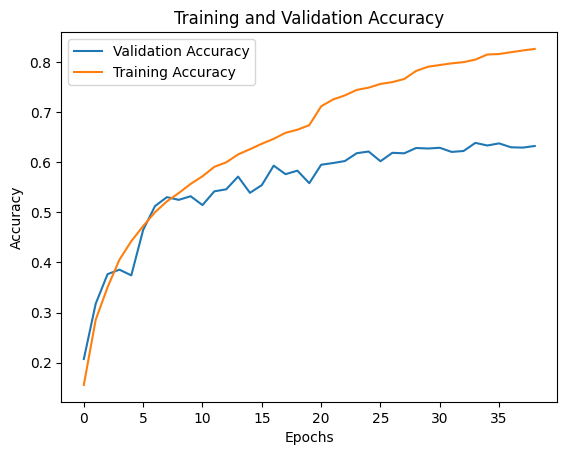

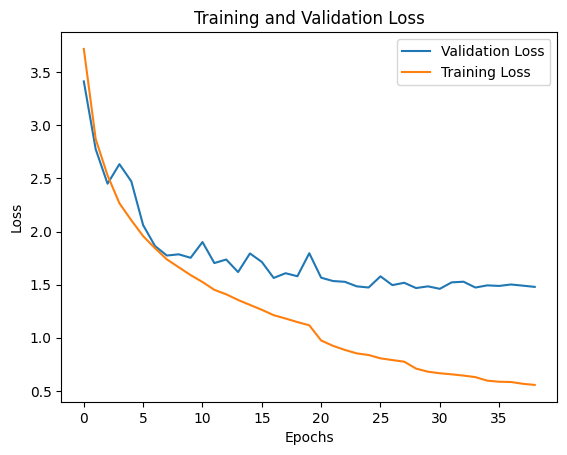

In [ ]:
with mlflow.start_run(run_name="model_training"):
    mlflow.log_params({
        "batch_size": 64,
        "epochs": 50,
        "optimizer": "Adam",
        "reduce_lr_factor": 0.5,
        "reduce_lr_patience": 5,
        "early_stopping_patience": 5
    })
    mlflow.log_params(best_hps.values)

    # Entra√Æne le mod√®le
    history = final_model.fit(
        datagen.flow(x_train1, y_train1, batch_size=64),
        epochs=50,
        batch_size=64,
        validation_data=(x_val, y_val),
        callbacks=[lr_reduction, early_stop],
        verbose=2
    )

    # Enregistre les m√©triques
    for epoch, acc in enumerate(history.history['accuracy']):
        mlflow.log_metric("train_accuracy", acc, step=epoch)

    for epoch, val_acc in enumerate(history.history['val_accuracy']):
        mlflow.log_metric("val_accuracy", val_acc, step=epoch)

    for epoch, loss in enumerate(history.history['loss']):
        mlflow.log_metric("train_loss", loss, step=epoch)

    for epoch, val_loss in enumerate(history.history['val_loss']):
        mlflow.log_metric("val_loss", val_loss, step=epoch)

    # Enregistre le mod√®le
    mlflow.keras.log_model(final_model, artifact_path="final_model")

    # Enregistre les courbes d'apprentissage
    import matplotlib.pyplot as plt

    plt.figure()
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.title("Training and Validation Accuracy")
    plt.savefig("accuracy_curve.png")
    mlflow.log_artifact("accuracy_curve.png")

    plt.figure()
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.plot(history.history['loss'], label='Training Loss')
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.title("Training and Validation Loss")
    plt.savefig("loss_curve.png")
    mlflow.log_artifact("loss_curve.png")

### √âvaluation sur les donn√©es de test

Le mod√®le final est √©valu√© sur l'ensemble de test pour mesurer la perte et la pr√©cision.

### R√©sultats sur les donn√©es de test

- **Test Loss** : 1.4953  
- **Test Accuracy** : 63.66%


In [ ]:
# √âvaluation du mod√®le sur les donn√©es de test
loss, accuracy = final_model.evaluate(x_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Test Loss: 1.4953
Test Accuracy: 0.6366


## CNN sans transfert

## Comparaison